# scqubits example: computing coherence properties
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import numpy as np
import scqubits as scq

**Units.** To calculate coherence times, scqubits needs to know the frequency units used. The current (and default) units are:

In [2]:
scq.get_units()

'GHz'

# Qubits and their noise channels
## Transmon / Cooper pair box (charge-regime parameters)

In [3]:
transmon = scq.Transmon(
    EJ=0.5,
    EC=12.0,
    ng=0.3,
    ncut=150
)
print(transmon)

Transmon------------| [Transmon_1]
                    | EJ: 0.5
                    | EC: 12.0
                    | ng: 0.3
                    | ncut: 150
                    | truncated_dim: 6
                    |
                    | dim: 301



### Computing and visualizing $T_1$ and $T_2$

To list the noise channels supported by this qubit, call `supported_noise_channels()`:

In [4]:
transmon.supported_noise_channels()

['tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive',
 't1_charge_impedance']

**Example: dephasing time due to 1/f charge noise.** We can calculate a given decoherence time with an appropriate method. Taking default parameters:

In [5]:
transmon.tphi_1_over_f_ng()

3.770056749342735

Since we are using default frequency units of GHz, the time units are 1/GHz = ns.

Choices deviating from the default parameters are accesible via optional arguments: (eg., choose a downward transition from level 3 to 1, at T=0.100K):

In [6]:
transmon.t1_charge_impedance(i=3, j=1, T=0.100)

See documentation for details.
This warning can be disabled by executing:
scqubits.settings.T1_DEFAULT_WARNING=False

 /run/media/Data/Dropbox/Synced_Data/Northwestern/Research-Koch/Circuit-Hamiltonian/scqubits_branch/scqubits/scqubits/core/noise.py: 1200

3013.2215669102766

**Depolarization.** scqubits can approximate the (cumulative) effective noise, calculated form the total contributions of a variety of noise channels (that can be fine-tuned by the user). In the case of depolarization noise, the effective (or combined) noise is obtained from 

\begin{equation}
\frac{1}{T_{1}^{\rm eff}} = \sum_k \frac{1}{T_{1}^{k}},
\end{equation}

where the sum runs over all noise channels that the user wants included. By default, the set of noise channels correponds to the list returned by the `effective_noise_channels` method for each qubit. A different list of noise channels can be provided as an argument. 

**Dephasing.** Similarly, users can calculate effective dephasing times, which includes contributions from both pure dephasing, as well as depolarization channels. Such a $T_{2}$ time is defined as

\begin{equation}
\frac{1}{T_{2}^{\rm eff}} = \sum_k \frac{1}{T_{\phi}^{k}} +  \frac{1}{2} \sum_j \frac{1}{T_{1}^{j}}, 
\end{equation}

where $k$ ($j$) run over the relevant pure dephasing (depolariztion) channels that can contribute to the effective noise. 

**Example: effective $T_1$.** For the above transmon, we obtain

In [7]:
transmon.t1_effective()

2166838.6419612635

It is worth stressing that in tha case of tramson, by default, `t1_effective()` does not include all the channels that the qubit supports. This can be seen by comparing the output of 

In [8]:
transmon.supported_noise_channels()

['tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive',
 't1_charge_impedance']

from

In [9]:
transmon.effective_noise_channels()

['tphi_1_over_f_cc', 'tphi_1_over_f_ng', 't1_capacitive']


**Plotting $T_1$ vs. offset charge.** We can plot the dependence of $T_1$ on the offset charge:

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

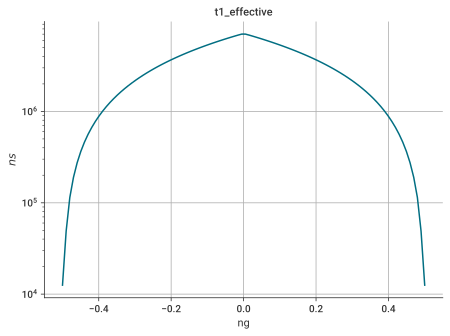

In [10]:
transmon.plot_t1_effective_vs_paramvals(param_name='ng', param_vals=np.linspace(-0.5, 0.5, 100));

**Computing and plotting the effective $T_2$.** For example, for the subspace defined by levels 2 and 3:

In [11]:
transmon.t2_effective(common_noise_options=dict(i=3,j=2))

1.2562838641414429

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

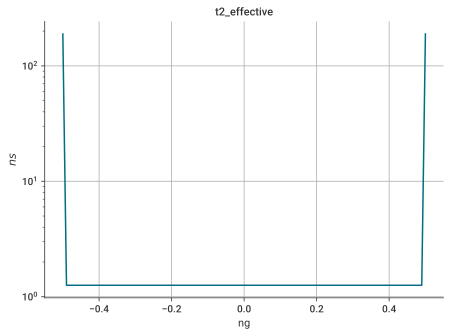

In [12]:
transmon.plot_t2_effective_vs_paramvals(param_name='ng', 
                                        param_vals=np.linspace(-0.5, 0.5, 100),
                                        common_noise_options=dict(i=3,j=2,total=False)
                                       );

**Overview plots.** 

scqubits provides an easy routine for assessing the coherence due to all supported noise channels. The generated plots show how coherence times from different channels vary as we modify one of the qubit parameters (here: offset charge). Time units of the plotted/calculated data are based on the currently set units.

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

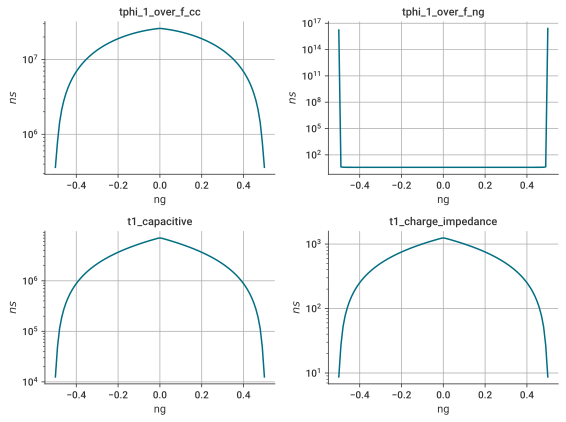

In [13]:
transmon.plot_coherence_vs_paramvals(param_name='ng', param_vals=np.linspace(-0.5, 0.5, 100));

We can also easily scale the results, so that end up with time in units of ms:

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

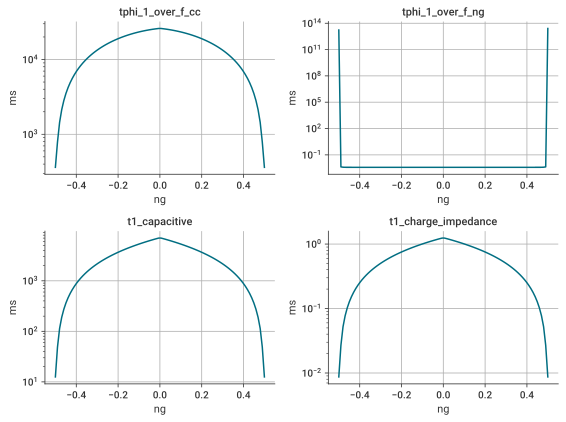

In [14]:
transmon.plot_coherence_vs_paramvals(param_name='ng', 
                                     param_vals=np.linspace(-0.5, 0.5, 100), 
                                     scale=1e-3, 
                                     ylabel=r"ms");

**Selecting noise channels & plot options.**

Instead of including all supported noise channels, we can make a selection. Furhermore, we can add extra customization to the plots. 

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

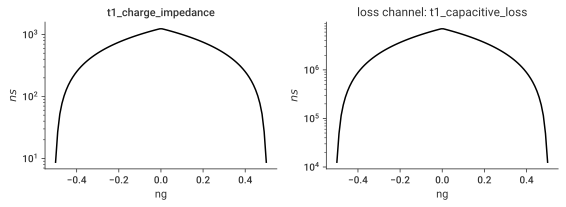

In [15]:
fig, ax = transmon.plot_coherence_vs_paramvals( 
                    param_name='ng', 
                    param_vals=np.linspace(-0.5, 0.5, 100), 
                    noise_channels=['t1_charge_impedance', 't1_capacitive'], 
                    color='black', grid=False);

#customize the title
ax[1].set_title("loss channel: t1_capacitive_loss");

We can also pass specific options to calculations for certain noise channels. As an example, we choose a non-default temperature for the ``t1_capacitive`` channel calculation, and a transition between non-default energy levels (2 and 3 instead of 0 and 1). 

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

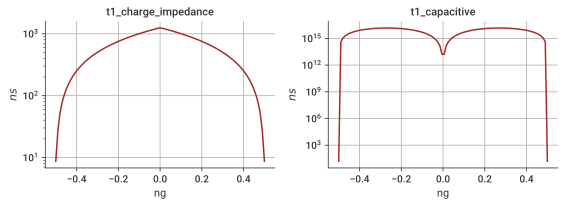

In [16]:
transmon.plot_coherence_vs_paramvals(param_name='ng',  
                                     param_vals=np.linspace(-0.5, 0.5, 100), 
                                     noise_channels=[
                                     't1_charge_impedance',
                                     ('t1_capacitive', dict(T=0.045, i=3, j=2))
                                     ],  
                                     color='brown');

Can also plot just one channel, and provide standard plotting options directly to ``plot_coherence_vs_paramvals()``

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

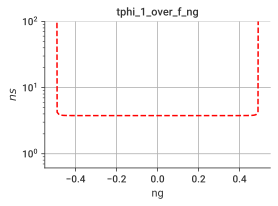

In [17]:
transmon.plot_coherence_vs_paramvals(
                    param_name='ng', 
                    param_vals=np.linspace(-0.5, 0.5, 100), 
                    noise_channels='tphi_1_over_f_ng', 
                    linestyle='--', color='red', ylim=(None, 1e2));

## Tunable Transmon

In [18]:
tune_tmon = scq.TunableTransmon(
    EJmax=20.0,
    EC=0.5,
    d=0.00,
    flux=0.0,
    ng=0.3,
    ncut=150
)
print(tune_tmon)
tune_tmon.supported_noise_channels()

TunableTransmon-----| [TunableTransmon_1]
                    | EJmax: 20.0
                    | EC: 0.5
                    | d: 0.0
                    | flux: 0.0
                    | ng: 0.3
                    | ncut: 150
                    | truncated_dim: 6
                    |
                    | dim: 301



['tphi_1_over_f_flux',
 'tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive',
 't1_flux_bias_line',
 't1_charge_impedance']

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

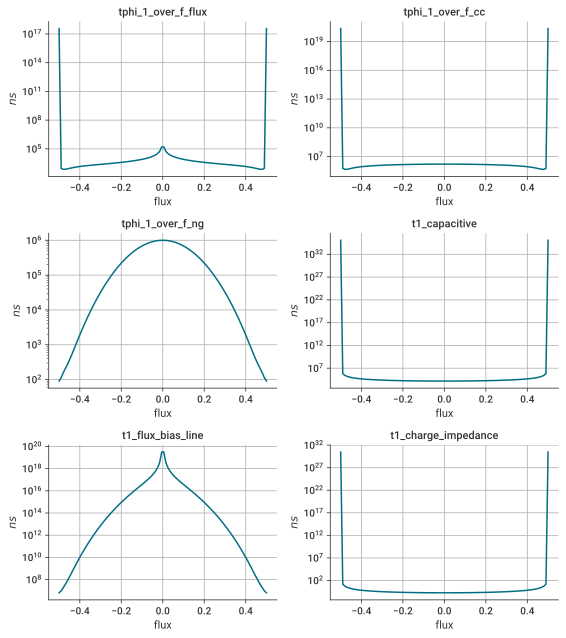

In [19]:
tune_tmon.plot_coherence_vs_paramvals(param_name='flux', param_vals=np.linspace(-0.5, 0.5, 100));

## Fluxonium

In [20]:
# Pop 2014 paper. 
fluxonium = scq.Fluxonium(
    EJ=12,
    EC=2.6,
    EL=0.5,
    cutoff = 150,
    flux = 0.2
)
print(fluxonium)
fluxonium.supported_noise_channels()

Fluxonium-----------| [Fluxonium_1]
                    | EJ: 12
                    | EC: 2.6
                    | EL: 0.5
                    | flux: 0.2
                    | cutoff: 150
                    | truncated_dim: 6
                    |
                    | dim: 150



['tphi_1_over_f_cc',
 'tphi_1_over_f_flux',
 't1_capacitive',
 't1_charge_impedance',
 't1_flux_bias_line',
 't1_inductive',
 't1_quasiparticle_tunneling']

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

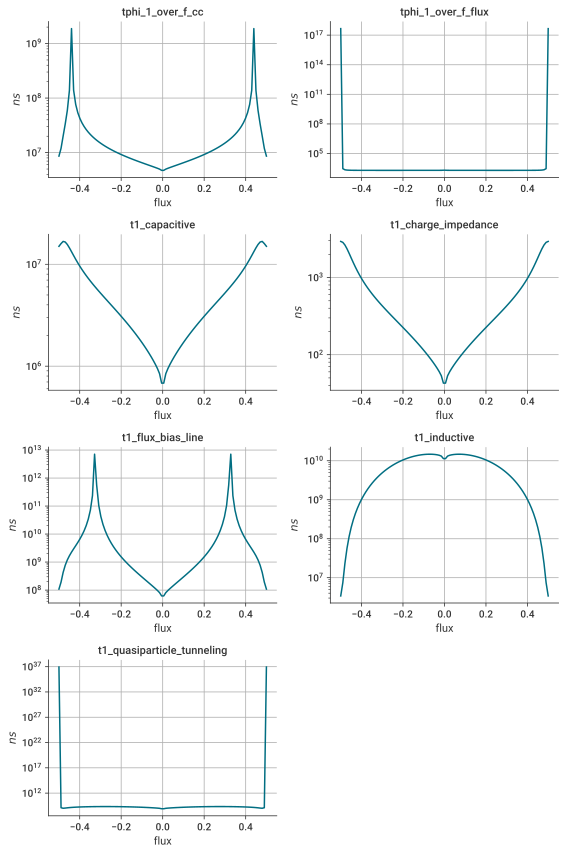

In [21]:
fluxonium.plot_coherence_vs_paramvals(param_name='flux', 
                                      param_vals=np.linspace(-0.5, 0.5, 100));

## Flux qubit

In [22]:
# parameters for the flux qubit
RATIO = 60.0
ALPHA = 0.8
flux_qubit = scq.FluxQubit(
    EJ1 = 1.0, 
    EJ2 = 1.0, 
    EJ3 = ALPHA*1.0, 
    ECJ1 = 1.0/RATIO, 
    ECJ2 = 1.0/RATIO, 
    ECJ3 = 1.0/ALPHA/RATIO, 
    ECg1 = 50.0/RATIO, 
    ECg2 = 50.0/RATIO, 
    ng1 = 0.0, 
    ng2 = 0.0, 
    flux = 0.4, 
    ncut = 10,
)
print(flux_qubit)

FluxQubit-----------| [FluxQubit_1]
                    | EJ1: 1.0
                    | EJ2: 1.0
                    | EJ3: 0.8
                    | ECJ1: 0.016666666666666666
                    | ECJ2: 0.016666666666666666
                    | ECJ3: 0.020833333333333332
                    | ECg1: 0.8333333333333334
                    | ECg2: 0.8333333333333334
                    | ng1: 0.0
                    | ng2: 0.0
                    | flux: 0.4
                    | ncut: 10
                    | truncated_dim: 6
                    |
                    | dim: 441



Let us see what noise channels are currently predefiend for this qubit:

In [23]:
flux_qubit.supported_noise_channels()

['tphi_1_over_f_cc1',
 'tphi_1_over_f_cc2',
 'tphi_1_over_f_cc3',
 'tphi_1_over_f_cc',
 'tphi_1_over_f_flux']

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

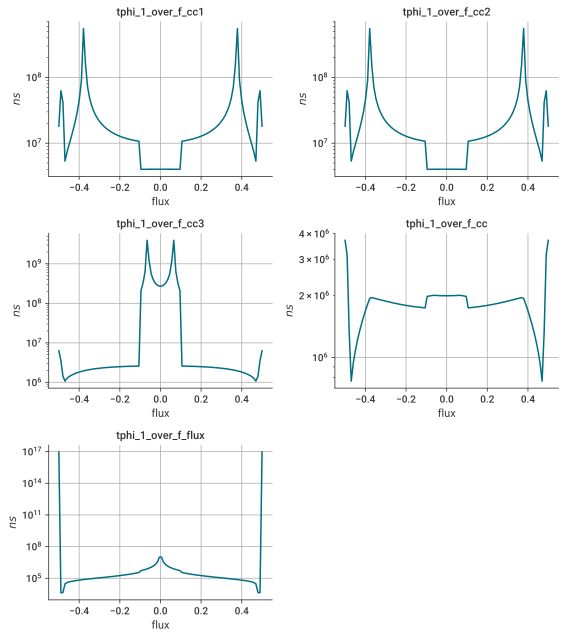

In [24]:
flux_qubit.plot_coherence_vs_paramvals(param_name='flux', param_vals=np.linspace(-0.5, 0.5, 100));

##  Zero-pi

In [25]:
phi_grid = scq.Grid1d(-6*np.pi, 6*np.pi, 200)

EJ_CONST = 1/3.95  # note that EJ and ECJ are interrelated

zero_pi = scq.ZeroPi(
    grid = phi_grid,
    EJ   = EJ_CONST,
    EL   = 10.0**(-2),
    ECJ  = 1/(8.0*EJ_CONST),
    EC = None,
    ECS  = 10.0**(-3),
    ng   = 0.1,
    flux = 0.23,
    ncut = 30
)
print(zero_pi)
zero_pi.supported_noise_channels()

ZeroPi--------------| [ZeroPi_1]
                    | EJ: 0.2531645569620253
                    | EL: 0.01
                    | ECJ: 0.4937500000000001
                    | EC: 0.001002029426686961
                    | dEJ: 0.0
                    | dCJ: 0.0
                    | ng: 0.1
                    | flux: 0.23
                    | ncut: 30
                    | truncated_dim: 6
                    |
                    | dim: 12200



['tphi_1_over_f_cc', 'tphi_1_over_f_flux', 't1_flux_bias_line', 't1_inductive']

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

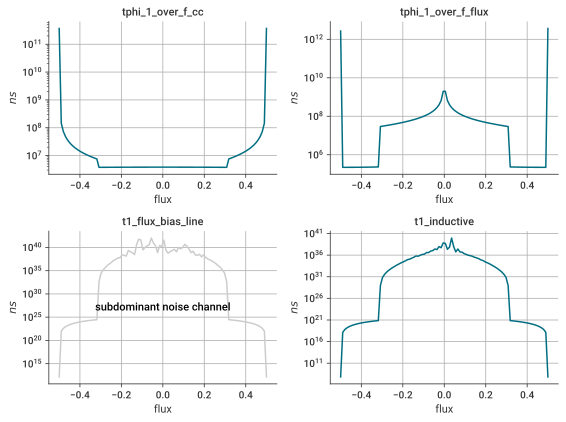

In [26]:
zero_pi.plot_coherence_vs_paramvals(param_name='flux', param_vals=np.linspace(-0.5, 0.5, 100));